### Divided difference interpolation

This follows from the wk1 notes

A key benefit of this method is that you can add points without recalculating the former points. But, calculating the new points requires you to know the former point values. The coefficients are values, not functions, so therefore it should be inexpensive to store the values for future use.

_TODO - create a method to take an existing table of coefficients and add a point, you should be able to get away with less computation._

In [3]:
function table = dividedDifferenceTable(points, pointsCount)
    # there must be as many levels to the table as there are points
    table = zeros(pointsCount, pointsCount+1);
    table(:,1) = points(:,1);
    table(:,2) = points(:,2); # first col of difference table is the pts x values

    for j = 3:(pointsCount+1) # because the first two columns are given
        for i = (j-1):pointsCount # the first difference is the second row
            table(i,j) = (table(i,j-1) - table(i-1,j-1))/(table(i,1) - table(i-j+2,1)); # see the document on denominator pattern
        end
    end
end

In [4]:
function y = substitutedPoints(x, table)

    y = table(1,2); # first coefficient is not applied to a point
    
    for i = 2:(length(table(:,1)))
        
        # y = table(i=1,j=2) + ...
        #     table(i=2,j=3)*(x - points(k=1,1)) + ...
        #     table(i=3,j=4)*(x - points(k=1,1))*(x - points(k=2,1) + ...
 
        productOfXDifferences = 1;
        for k = 1:(i-1) # the ith coefficient has a i-1 degree polynomial of x
            productOfXDifferences = productOfXDifferences .* (x .- table(k,1));
        end
        y = y .+ (productOfXDifferences .* table(i, i+1));
    end
end

   -1    4    0    0
    0    9    5    0
    2   13    2   -1
  -x⋅(x + 1) + 5⋅x + 9
error: __go_line__: invalid value for array property "ydata", unable to create graphics handle
error: called from
    __plt__>__plt2vs__ at line 466 column 15
    __plt__>__plt2__ at line 245 column 14
    __plt__ at line 112 column 18
    plot at line 229 column 10


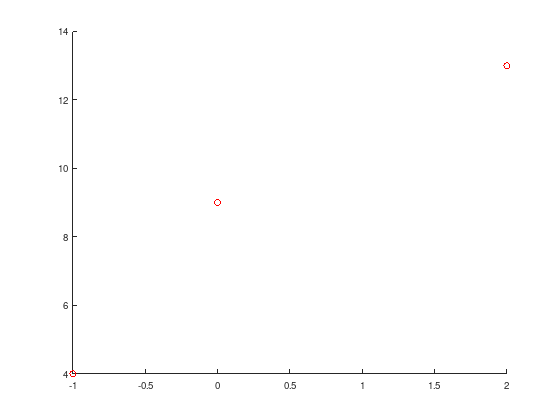

In [13]:
points = [-1 4;
          0 9;
          2 13];

xSpace = min(points(:,1)):0.05:max(points(:,1));
pointsCount = length(points);
table = dividedDifferenceTable(points, pointsCount);

disp(table)

# To check polynomial, run this
pkg load symbolic
syms x
y = substitutedPoints(x, table);
disp(y)

# y = substitutedPoints(xSpace, table);

plot(xSpace, y);
hold on;
plot(points(:,1), points(:,2), "ro");